In [1]:
import pandas_datareader as web
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
symbol = input('Type the symbol: ')
symbol.upper()
df = web.DataReader(symbol, data_source='yahoo', start='2015-01-01', end='2020-09-21')
print("History data")
df

Type the symbol: aapl
History data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.941502
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.238857
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.241146
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.581060
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.525522
...,...,...,...,...,...,...
2020-09-15,118.830002,113.610001,118.330002,115.540001,184642000.0,115.540001
2020-09-16,116.000000,112.040001,115.230003,112.129997,154679000.0,112.129997
2020-09-17,112.199997,108.709999,109.720001,110.339996,178011000.0,110.339996


In [3]:
export_csv = df.to_csv('df.csv')
export_csv

In [4]:
df_close = df["Close"]
print(df_close.shape)

last_month_close = df_close[-30:]

last_month_dataset = last_month_close.values

#create the future data 
future_data = []
for i in last_month_dataset:
  future_data.append(i)
  
k = 3
for j in range(len(last_month_dataset)-k):
  future_data[j] = last_month_dataset[j+k]


future_data

(1440,)


[115.01000213623047,
 114.90750122070312,
 114.60749816894531,
 115.5625,
 115.7074966430664,
 118.2750015258789,
 124.37000274658203,
 125.85749816894531,
 124.82499694824219,
 126.52249908447266,
 125.01000213623047,
 124.80750274658203,
 129.0399932861328,
 134.17999267578125,
 131.39999389648438,
 120.87999725341797,
 120.95999908447266,
 112.81999969482422,
 117.31999969482422,
 113.48999786376953,
 112.0,
 115.36000061035156,
 115.54000091552734,
 112.12999725341797,
 110.33999633789062,
 106.83999633789062,
 110.08000183105469,
 110.33999633789062,
 106.83999633789062,
 110.08000183105469]

In [5]:
#Get the numbers of rows and columns in the data set  
print(df.shape)


(1440, 6)


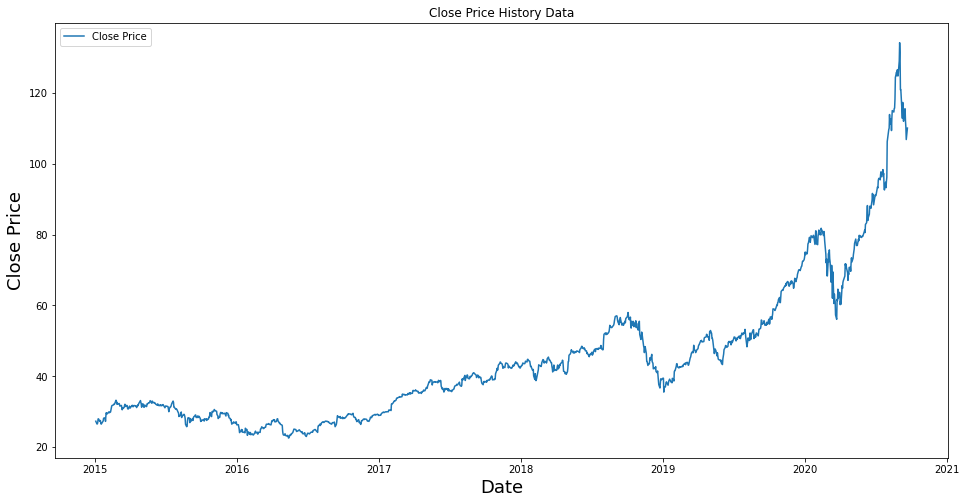

In [6]:
mid_price = df['Low']+df['High']/2.0
#Visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price History Data')
plt.plot(df['Close'],label='Close Price')
#plt.plot(mid_price, label='Mid Price',color='black')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Close Price'])
plt.show()

In [7]:
#Create a new dataframe with close 
data = df.filter(['Close'])
#Converte the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the data
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1152

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04254224],
       [0.03564229],
       [0.0356647 ],
       ...,
       [0.78637038],
       [0.75500696],
       [0.78404057]])

In [9]:
#Create the training dataset 
#Create the scaled traing dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train 
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.04254224, 0.03564229, 0.0356647 , 0.03900265, 0.04827726,
       0.0485461 , 0.04236302, 0.04453606, 0.04359516, 0.03691923,
       0.03505982, 0.04117569, 0.0430351 , 0.04941979, 0.05071914,
       0.05098796, 0.04211659, 0.05593889, 0.06398138, 0.06008336,
       0.0633765 , 0.06342132, 0.06545993, 0.06631123, 0.06404858,
       0.06581838, 0.07097093, 0.07737803, 0.08091761, 0.08230657,
       0.08398675, 0.08598057, 0.0853757 , 0.08772796, 0.09556881,
       0.09370941, 0.08613737, 0.08978898, 0.08539812, 0.08680945,
       0.08741433, 0.08557731, 0.08080561, 0.08123125, 0.08244098,
       0.07654915, 0.07146378, 0.07641472, 0.07448811, 0.07753484,
       0.08221696, 0.08542051, 0.08324747, 0.07966308, 0.0825978 ,
       0.08143288, 0.07401766, 0.07594427, 0.07372643, 0.080716  ])]
[0.07636992231957127]



In [10]:
#Converte the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
#(x_train, (x_train.shape[0],x_train.shape[1],1)) = (1606,60,1)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1092, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=1)

1092/1092 [==============================] - 24s 22ms/step - loss: 3.0557e-04


In [15]:
#Create the testing dataset
#Create a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60: , :]
#Create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [16]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [17]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [19]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test) **2 )
rmse



3.5279562870661416

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


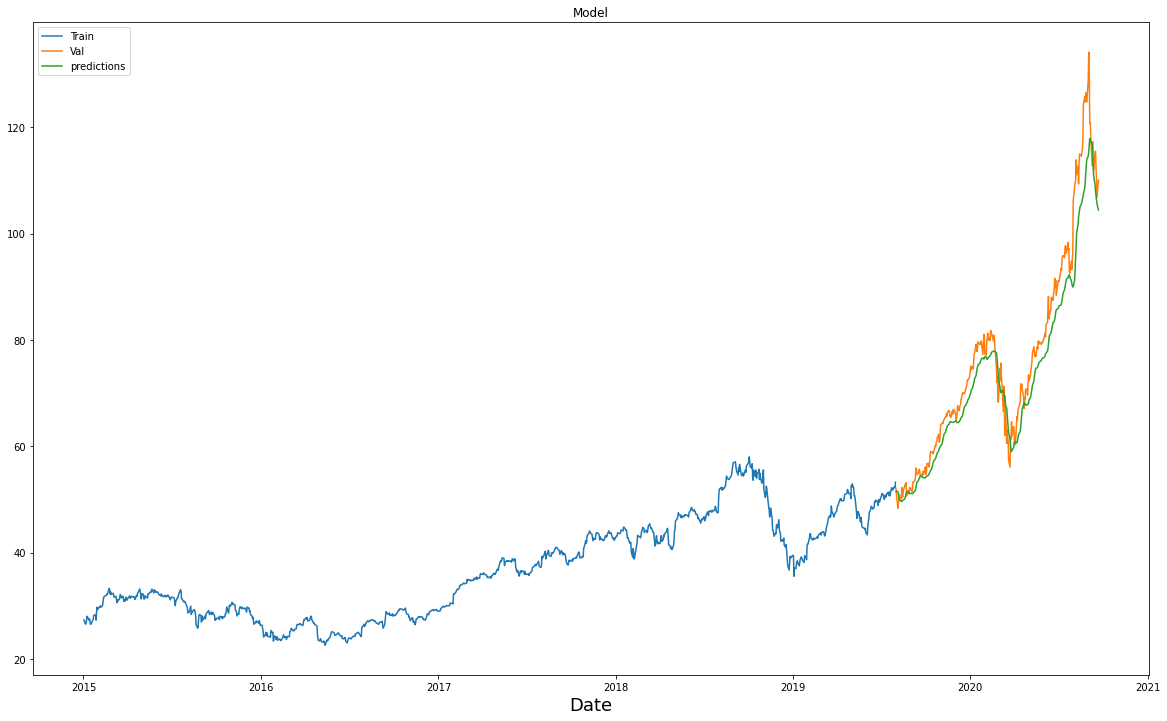

In [20]:
#visualize the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(20,12))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])

plt.legend(['Train', 'Val', 'predictions'], loc=2)

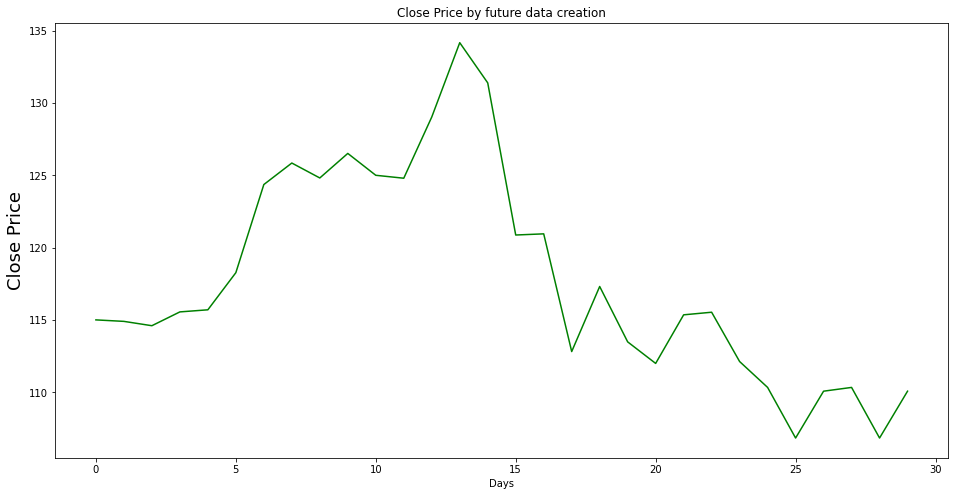

117.83674875895183


In [21]:
avg = sum(future_data)/len(future_data)
plt.figure(figsize=(16,8))
plt.title('Close Price by future data creation')
plt.plot(future_data, color='green')
plt.ylabel('Close Price', fontsize=18)
plt.xlabel('Days')
plt.show()
print(avg)

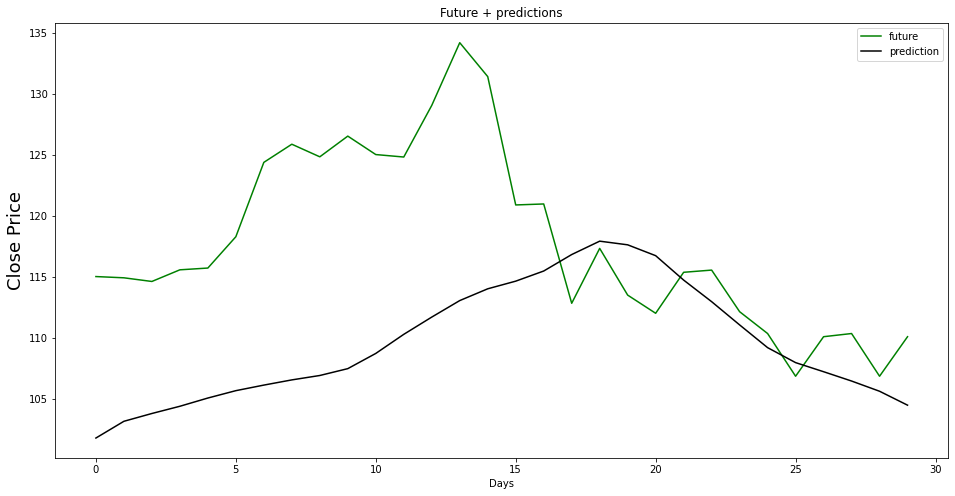

In [22]:
#average price per dataset
avg = sum(future_data)/len(future_data)
last_month_avg = sum(predictions[-30:])/len(predictions[-30:])

plt.figure(figsize=(16,8))
plt.title('Future + predictions')
plt.plot(future_data, color='green')
plt.plot(predictions[-30:], color='black')
plt.ylabel('Close Price', fontsize=18)
plt.xlabel('Days')
plt.legend(['future', 'prediction'], loc=1)
plt.show()